# <font color='blue'>Preventing Customer Churn Telecommunications Companies </font>


In [1]:
#Importing main packages to start exploratory analysis
import pandas as pd
import numpy as np
from pandas import read_csv
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
# Loading dataset
archive = 'projeto4_telecom_teste.csv'
data = read_csv(archive)
df=data.drop('Unnamed: 0', axis=1)
# Add Count
df["counter"]=1
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,counter
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,...,18.01,236.0,73,10.62,10.6,3,2.86,3,no,1
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,...,20.81,94.2,81,4.24,9.5,7,2.57,0,no,1
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,...,20.17,300.3,127,13.51,13.7,6,3.70,1,no,1
3,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,...,10.74,220.6,82,9.93,15.7,2,4.24,1,no,1
4,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,...,10.54,204.5,107,9.20,7.7,4,2.08,2,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,...,18.96,297.5,116,13.39,9.9,5,2.67,2,no,1
1663,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,...,21.83,213.6,113,9.61,14.7,2,3.97,3,yes,1
1664,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,...,14.69,212.4,97,9.56,13.6,4,3.67,1,no,1
1665,DC,109,area_code_510,no,no,0,188.8,67,32.10,171.7,...,14.59,224.4,89,10.10,8.5,6,2.30,0,no,1


# Exploratory data analysis

In [3]:
# Checking datatypes
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
counter                            int64
dtype: object

In [4]:
# further on we must balance the dataset
df.groupby("churn").size()

churn
no     1443
yes     224
dtype: int64

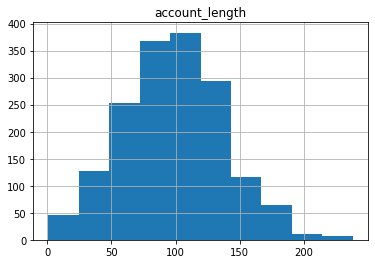

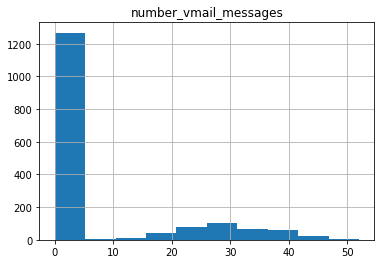

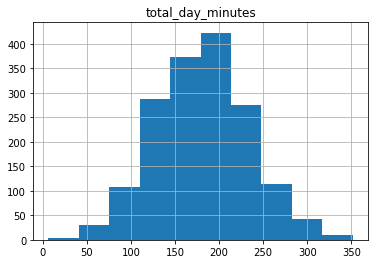

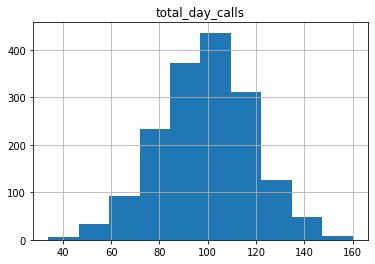

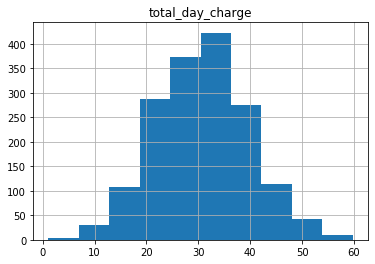

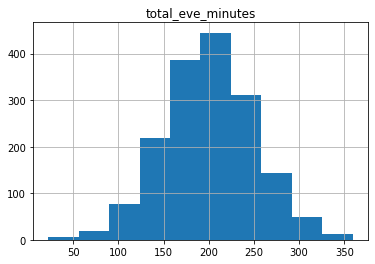

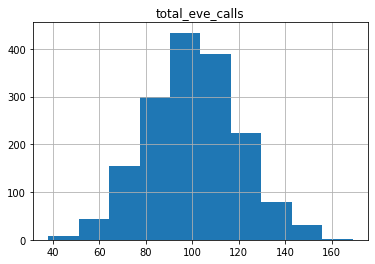

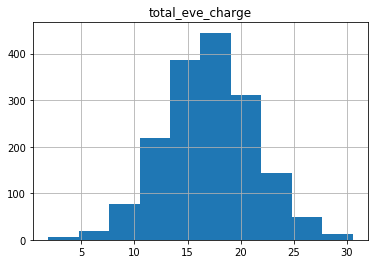

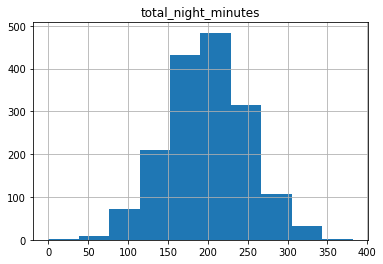

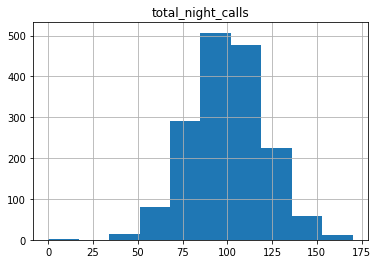

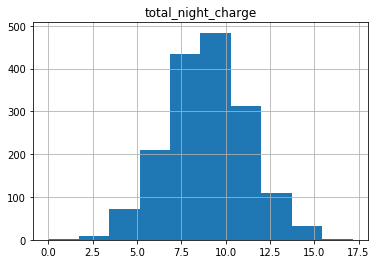

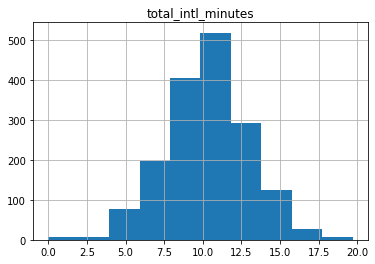

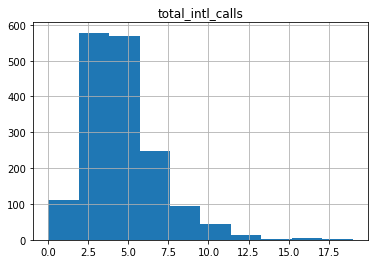

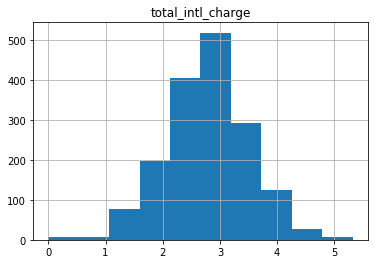

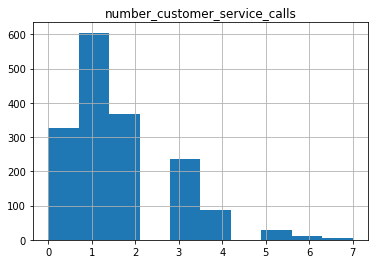

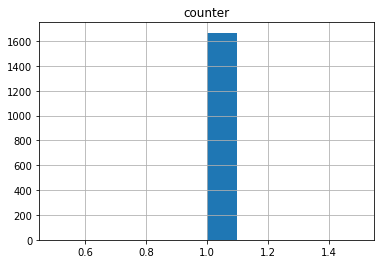

In [5]:
for features in df.columns:
    if df[features].dtypes!='object':
        df.hist(features)

In [6]:
Calls_Churn=df.groupby(["number_customer_service_calls","churn"]).agg({"churn":["count"]}).reset_index()
Calls_Churn.columns=["Ligacoes","churn","volume"]
Calls_Churn_grp=Calls_Churn.pivot(index="Ligacoes",columns='churn',values='volume')
Calls_Churn_grp["Total"]=Calls_Churn_grp["yes"]+Calls_Churn_grp["no"]
Calls_Churn_grp["Churn_perc"]=round(Calls_Churn_grp["yes"]/Calls_Churn_grp["Total"]*100,2)
Calls_Churn_grp

churn,no,yes,Total,Churn_perc
Ligacoes,,,,
0,297,29,326,8.90
1,537,68,605,11.24
2,333,35,368,9.51
3,207,29,236,12.29
4,51,35,86,40.70
5,12,18,30,60.00
6,4,8,12,66.67
7,2,2,4,50.00


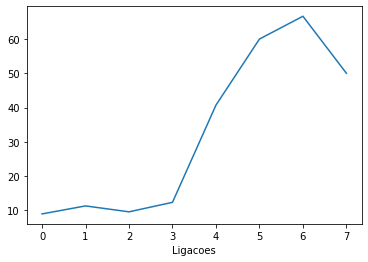

In [7]:
# As we can below from 4 calls on more than half cancel their plans. Therefore lets create a feature called "CS_Calls_Range" wihch takes ""<4" or "">=4"
Calls_Churn_grp["Churn_perc"].plot(kind='line')

In [8]:
df["CS_Calls_Range"]=np.where(df["number_customer_service_calls"]<4,"0-3","4-7")

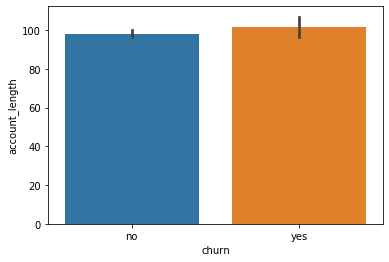

In [9]:
# At first there is no correlation between account_length and churns
sns.barplot(x = "churn", y = "account_length", data = df);

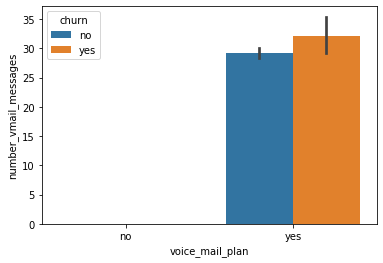

In [10]:
# barplot
sns.barplot(x = "voice_mail_plan", y = "number_vmail_messages", hue = "churn", data = df);

In [11]:
df["total_day_min_per_call"]=df["total_day_minutes"]/df["total_day_calls"]
df["total_eve_min_per_call"]=df["total_eve_minutes"]/df["total_eve_calls"]
df["total_night_min_per_call"]=df["total_night_minutes"]/df["total_night_calls"]
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,counter,CS_Calls_Range,total_day_min_per_call,total_eve_min_per_call,total_night_min_per_call
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,...,10.6,3,2.86,3,no,1,0-3,0.576423,2.902740,3.232877
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,...,9.5,7,2.57,0,no,1,0-3,2.600000,1.761151,1.162963
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,...,13.7,6,3.70,1,no,1,0-3,3.102105,2.260000,2.364567
3,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,...,15.7,2,4.24,1,no,1,0-3,1.762602,1.436364,2.690244
4,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,...,7.7,4,2.08,2,no,1,0-3,2.530769,1.227723,1.911215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,...,9.9,5,2.67,2,no,1,0-3,1.855906,1.769841,2.564655
1663,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,...,14.7,2,3.97,3,yes,1,0-3,2.046667,3.517808,1.890265
1664,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,...,13.6,4,3.67,1,no,1,0-3,1.579775,1.350000,2.189691
1665,DC,109,area_code_510,no,no,0,188.8,67,32.10,171.7,...,8.5,6,2.30,0,no,1,0-3,2.817910,1.866304,2.521348


In [12]:
df["highest_period_minutes"]=df[["total_day_min_per_call","total_eve_min_per_call","total_night_min_per_call"]].idxmax(axis=1)
df[["highest_period_minutes"]]=df[["highest_period_minutes"]].replace(["total_day_min_per_call","total_eve_min_per_call","total_night_min_per_call"], ["day","eve","night"])
df


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,counter,CS_Calls_Range,total_day_min_per_call,total_eve_min_per_call,total_night_min_per_call,highest_period_minutes
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,...,3,2.86,3,no,1,0-3,0.576423,2.902740,3.232877,night
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,...,7,2.57,0,no,1,0-3,2.600000,1.761151,1.162963,day
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,...,6,3.70,1,no,1,0-3,3.102105,2.260000,2.364567,day
3,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,...,2,4.24,1,no,1,0-3,1.762602,1.436364,2.690244,night
4,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,...,4,2.08,2,no,1,0-3,2.530769,1.227723,1.911215,day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,...,5,2.67,2,no,1,0-3,1.855906,1.769841,2.564655,night
1663,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,...,2,3.97,3,yes,1,0-3,2.046667,3.517808,1.890265,eve
1664,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,...,4,3.67,1,no,1,0-3,1.579775,1.350000,2.189691,night
1665,DC,109,area_code_510,no,no,0,188.8,67,32.10,171.7,...,6,2.30,0,no,1,0-3,2.817910,1.866304,2.521348,day


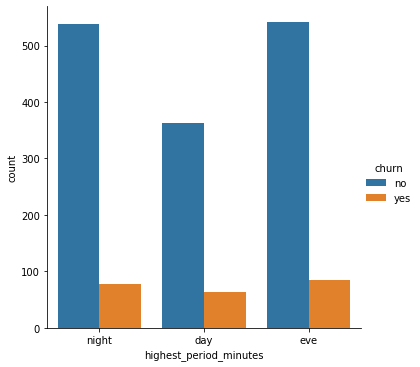

In [13]:
# barplot
sns.catplot(x = "highest_period_minutes", kind="count", hue = "churn", data = df);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002199F50EB48>]],
      dtype=object)

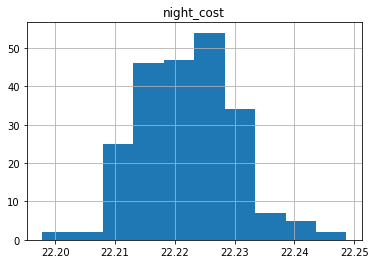

In [14]:
churn=df[df["churn"]=="yes"][["total_day_minutes","total_day_charge","total_eve_minutes","total_eve_charge","total_night_minutes","total_night_charge"]]
churn["night_cost"]=churn["total_night_minutes"]/churn["total_night_charge"]
churn.hist("night_cost")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002199F554408>]],
      dtype=object)

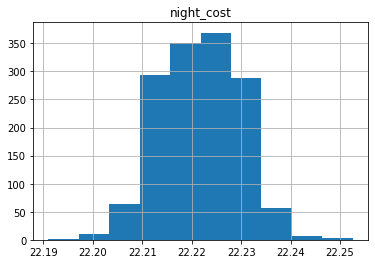

In [15]:
churn=df[df["churn"]=="no"][["total_day_minutes","total_day_charge","total_eve_minutes","total_eve_charge","total_night_minutes","total_night_charge"]]
churn["night_cost"]=churn["total_night_minutes"]/churn["total_night_charge"]
churn.hist("night_cost")

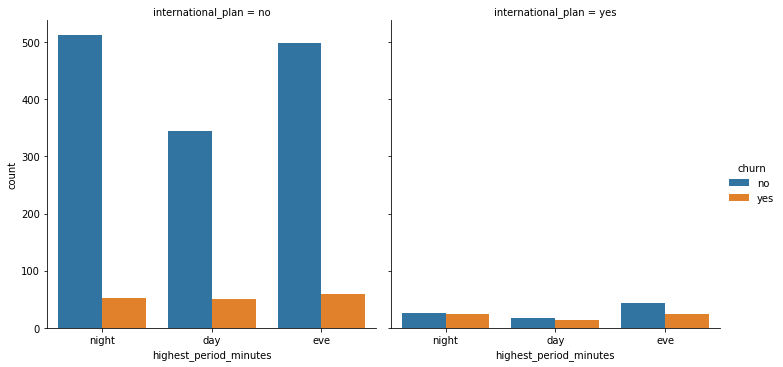

In [16]:
# barplot
sns.catplot(x = "highest_period_minutes", kind="count", hue = "churn", col="international_plan", data = df);

In [17]:
df[df["international_plan"]=="yes"].pivot_table(values="counter",index="CS_Calls_Range",columns=["churn"],aggfunc="sum",fill_value=0)

churn,no,yes
CS_Calls_Range,,
0-3,85,52
4-7,3,10


In [18]:
df.pivot_table(values="counter",index="CS_Calls_Range",columns=["international_plan","churn"],aggfunc="sum",fill_value=0)

international_plan    no      yes    
churn                 no  yes  no yes
CS_Calls_Range                       
0-3                 1289  109  85  52
4-7                   66   53   3  10

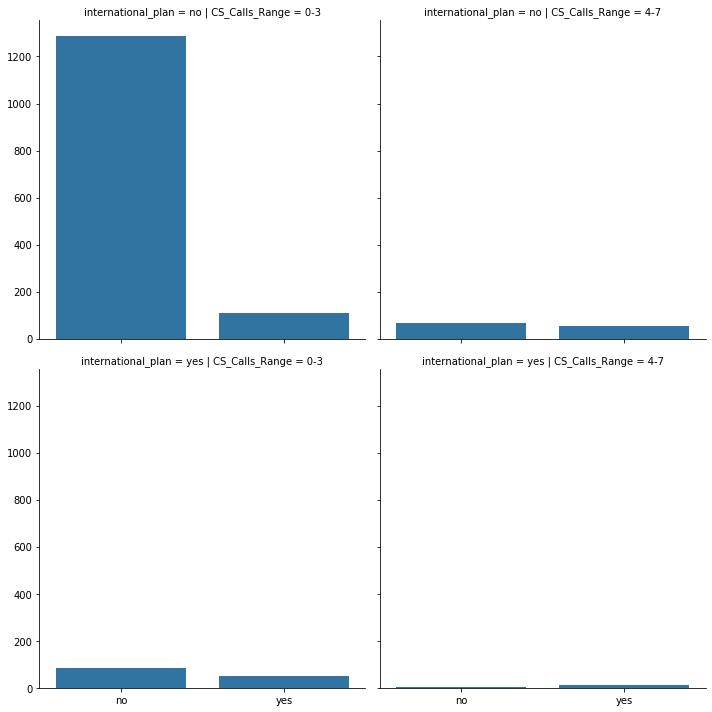

In [19]:
# Customers who have internacional plan used to cancel more than those haven't
g = sns.FacetGrid(df, col="CS_Calls_Range",  row="international_plan",size=5)
g.map_dataframe(sns.countplot, x="churn")

In [20]:
churn_state=df.pivot_table(values="counter",index="state",columns="churn", aggfunc='sum').reset_index()
churn_state["total"]=churn_state["yes"]+churn_state["no"]
churn_state["yes_perc"]=round(churn_state["yes"]/churn_state["total"]*100,1)
churn_state=churn_state.sort_values(by=["yes_perc"], ascending=False)
churn_state.head(10)

churn,state,no,yes,total,yes_perc
47,WA,22.0,10.0,32.0,31.2
4,CA,13.0,5.0,18.0,27.8
42,TN,27.0,9.0,36.0,25.0
36,OK,22.0,7.0,29.0,24.1
49,WV,40.0,12.0,52.0,23.1
31,NJ,34.0,10.0,44.0,22.7
26,MT,24.0,7.0,31.0,22.6
3,AZ,20.0,5.0,25.0,20.0
12,IA,20.0,5.0,25.0,20.0
37,OR,29.0,7.0,36.0,19.4


In [21]:
churn_state.dtypes

churn
state        object
no          float64
yes         float64
total       float64
yes_perc    float64
dtype: object

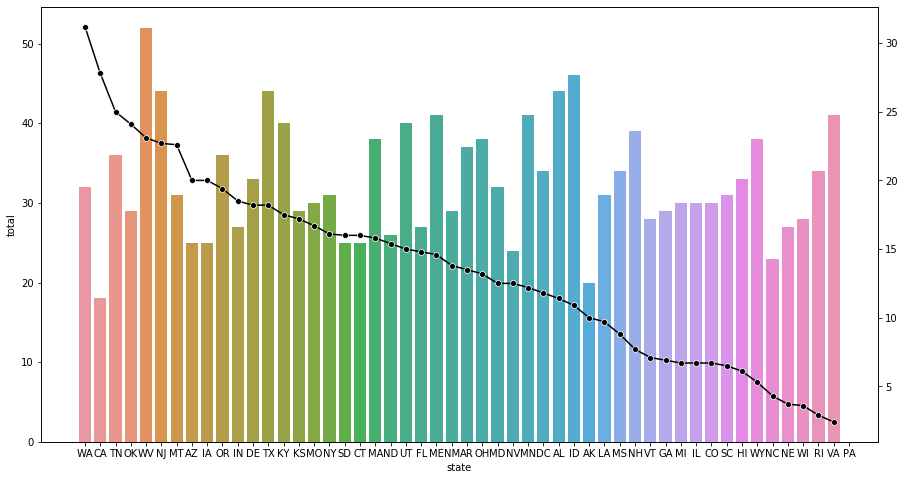

In [22]:
fig, ax1 = plt.subplots(figsize=(15,8))

sns.barplot(x="state", y="total", data=churn_state, ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data = churn_state['yes_perc'].values, marker='o', ax=ax2, color="black")

In [23]:
def faixa(valor):
    if valor <= 5.0:
        return '0-5'
    elif valor<=10.0:
        return '5-10'
    elif valor<=15.0:
        return '10-15'
    elif valor<=20.0:
        return '15-20'
    elif valor<=25.0:
        return '20-25'
    elif valor<=100:
        return '>25'
    else:
        return '0-5'

In [24]:
churn_state["range_churn"]=churn_state['yes_perc'].apply(faixa)

In [25]:
df=df.merge(churn_state[["state","range_churn"]], on = 'state')

# Feature Selection

In [26]:
#State
#Internacional Plan
#number_customer_service_calls
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'counter', 'CS_Calls_Range',
       'total_day_min_per_call', 'total_eve_min_per_call',
       'total_night_min_per_call', 'highest_period_minutes', 'range_churn'],
      dtype='object')

In [27]:
df_FS=df[['range_churn', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge','CS_Calls_Range',
       'highest_period_minutes','churn']]

# Dataset Transformation

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
df_FS.dtypes[df_FS.dtypes=='object']

range_churn               object
area_code                 object
international_plan        object
voice_mail_plan           object
CS_Calls_Range            object
highest_period_minutes    object
churn                     object
dtype: object

Columns 'international_plan', 'voice_mail_plan', 'CS_Calls_Range', 'churn' are of binary type, i.e, having 'yes' or 'no' as values. They will be converted to 1 and 0 respectively.

In [30]:
df_FS[['international_plan']]=df_FS[['international_plan']].replace(['yes','no'], [1,0])
df_FS[['voice_mail_plan']]=df_FS[['voice_mail_plan']].replace(['yes','no'], [1,0])
df_FS[['churn']]=df_FS[['churn']].replace(['yes','no'], [1,0])

Column 'CS_Calls_Range' has '0-3' or '4-7' as values. They will be converted to 1 and 0 respectively.

In [31]:
df_FS[['CS_Calls_Range']]=df_FS[['CS_Calls_Range']].replace(['0-3','4-7'], [1,0])

Column 'area_code' and 'highest_period_minutes' has three possible values. Let's break each feature into 3 binary column.

    area_code

In [32]:
enc = OneHotEncoder(handle_unknown='ignore', categories=[['area_code_510','area_code_408','area_code_415']])
enc_cols = enc.fit_transform(df_FS[['area_code']]).toarray().astype('int')
enc_df = pd.DataFrame(enc_cols, columns = ['area_code_510','area_code_408','area_code_415'])
enc_df
df_FS = df_FS.join(enc_df)

    highest_period_minutes

In [33]:
enc = OneHotEncoder(handle_unknown='ignore', categories=[['night','day','eve']])
enc_cols = enc.fit_transform(df_FS[['highest_period_minutes']]).toarray().astype('int')
enc_df = pd.DataFrame(enc_cols, columns = ['night','day','eve'])
enc_df
df_FS = df_FS.join(enc_df)

For 'state' feature there are six possible values. The same reasoning from previous cases was used.  

In [34]:
enc = OneHotEncoder(handle_unknown='ignore', categories=[['0-5','5-10','10-15','15-20','20-25','>25']])
enc_cols = enc.fit_transform(df_FS[['range_churn']]).toarray().astype('int')
enc_df = pd.DataFrame(enc_cols, columns = ['0-5','5-10','10-15','15-20','20-25','>25'])
enc_df
df_FS = df_FS.join(enc_df)

For n possible values in a feature we need just n-1 columns to identify all of them. Let's drop one of binares columns native from each feature. 

In [35]:
df_FS.columns

Index(['range_churn', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'CS_Calls_Range',
       'highest_period_minutes', 'churn', 'area_code_510', 'area_code_408',
       'area_code_415', 'night', 'day', 'eve', '0-5', '5-10', '10-15', '15-20',
       '20-25', '>25'],
      dtype='object')

In [36]:
df_T = df_FS.drop(['area_code','area_code_510','range_churn','0-5','highest_period_minutes','night',], 1)

In [37]:
df_T.columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'CS_Calls_Range', 'churn', 'area_code_408',
       'area_code_415', 'day', 'eve', '5-10', '10-15', '15-20', '20-25',
       '>25'],
      dtype='object')

## Normalizering Dataset

In [38]:
churn_state['yes_perc'].values

array([31.2, 27.8, 25. , 24.1, 23.1, 22.7, 22.6, 20. , 20. , 19.4, 18.5,
       18.2, 18.2, 17.5, 17.2, 16.7, 16.1, 16. , 16. , 15.8, 15.4, 15. ,
       14.8, 14.6, 13.8, 13.5, 13.2, 12.5, 12.5, 12.2, 11.8, 11.4, 10.9,
       10. ,  9.7,  8.8,  7.7,  7.1,  6.9,  6.7,  6.7,  6.7,  6.5,  6.1,
        5.3,  4.3,  3.7,  3.6,  2.9,  2.4,  nan])

# Balancing Dataset by Oversampling Technique

In [39]:
# class count
class_count_0, class_count_1 = df_T['churn'].value_counts()

# Separate class
class_0 = df_T[df_T['churn'] == 0]
class_1 = df_T[df_T['churn'] == 1]

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1443, 27)
class 1: (224, 27)


In [40]:
class_1_over = class_1.sample(class_count_0, replace=True)
df_balanced = pd.concat([class_1_over, class_0], axis=0)
class_count_0_new, class_count_1_new = df_T['churn'].value_counts()
print(class_count_0_new, class_count_1_new)

1443 224


In [41]:
df_balanced.groupby("churn").size()

churn
0    1443
1    1443
dtype: int64

In [42]:
df_balanced

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,churn,area_code_408,area_code_415,day,eve,5-10,10-15,15-20,20-25,>25
956,78,0,0,0,226.3,88,38.47,306.2,81,26.03,...,1,1,0,0,1,0,0,0,1,0
1108,124,0,0,0,108.2,92,18.39,214.3,83,18.22,...,1,0,1,0,1,0,0,0,1,0
209,38,1,0,0,211.6,87,35.97,106.9,68,9.09,...,1,0,1,1,0,0,0,1,0,0
427,115,0,0,0,275.5,76,46.84,225.8,82,19.19,...,1,0,1,0,0,0,0,1,0,0
21,47,1,0,0,135.0,108,22.95,176.3,111,14.99,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,116,0,0,0,211.3,91,35.92,190.9,116,16.23,...,0,1,0,1,0,0,0,0,1,0
1663,122,0,0,0,189.9,87,32.28,193.9,118,16.48,...,0,1,0,1,0,0,0,0,1,0
1664,50,0,0,0,198.7,114,33.78,141.5,90,12.03,...,0,1,0,0,0,0,0,0,1,0
1665,71,0,0,0,123.8,130,21.05,226.5,91,19.25,...,0,0,1,0,1,0,0,0,1,0


# Training and Test Data

In [43]:
# Import modules
from sklearn.model_selection import train_test_split

# Training size
teste_size = 0.33

# Loading data
array = df_balanced.values

# Seprating in input and output components
X = array[:,0:21]
Y = df_balanced.iloc[:,21]


# Creating training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = teste_size)

In [44]:
#pip install --upgrade scikit-learn

# Import modules

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

result_scores=[]

In [45]:
def evauation_model(pred, y_val):
    score_MSE = round(mean_squared_error(pred, y_val),2)
    score_MAE = round(mean_absolute_error(pred, y_val),2)
    score_r2score = round(r2_score(pred, y_val),2)
    return score_MSE, score_MAE, score_r2score


In [46]:
# Logistic Regression
model = LogisticRegression()

# Training model
model.fit(X_train, Y_train)

# Model score on test data
forecast = model.predict(X_test)
# Forecast
forecast_LR=forecast
reportLR = classification_report(Y_test, forecast)

score_MSE, score_MAE, score_r2score = evauation_model(forecast,Y_test)
result_scores.append(('Logistic Regrassion',
                      round(score_MSE, 2),
                      round(score_MAE, 2),
                      round(score_r2score, 2),
                      round(model.score(X_test,Y_test), 2)
                     ))

print(reportLR)
print(result_scores)
#print(forecast)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       591
           1       0.95      0.95      0.95       362

    accuracy                           0.96       953
   macro avg       0.96      0.96      0.96       953
weighted avg       0.96      0.96      0.96       953

[('Logistic Regrassion', 0.04, 0.04, 0.84, 0.96)]


In [47]:
# Gradient Boosting Classifier
model = GradientBoostingClassifier()

# Training model
model.fit(X_train, Y_train)

# Model score on test data
forecast = model.predict(X_test)
# Forecast
forecast_GBC=forecast
reportGBC = classification_report(Y_test, forecast)

score_MSE, score_MAE, score_r2score = evauation_model(forecast,Y_test)
result_scores.append(('Gradient Boosting Classifier', round(score_MSE, 2), 
                      round(score_MAE, 2), 
                      round(score_r2score, 2),
                      round(model.score(X_test,Y_test), 2)
                      ))

print(reportGBC)
print(result_scores)


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       591
           1       0.99      0.98      0.98       362

    accuracy                           0.99       953
   macro avg       0.99      0.98      0.99       953
weighted avg       0.99      0.99      0.99       953

[('Logistic Regrassion', 0.04, 0.04, 0.84, 0.96), ('Gradient Boosting Classifier', 0.01, 0.01, 0.94, 0.99)]


In [48]:
# Random Forest Regressor
model = RandomForestRegressor()

# Training model
model.fit(X_train, Y_train)

# Model score on test data
forecast = model.predict(X_test)
forecast=[0 if item<0.5 else 1 for item in forecast]
# Forecast
forecast_RFR=forecast

reportRFR = classification_report(Y_test, forecast)

score_MSE, score_MAE, score_r2score = evauation_model(forecast,Y_test)
result_scores.append(('Random Forest Regressor',
                      round(score_MSE, 2),
                      round(score_MAE, 2),
                      round(score_r2score, 2),
                      round(model.score(X_test,Y_test), 2)
                     ))

print(reportRFR)
print(result_scores)


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       591
           1       0.97      0.96      0.96       362

    accuracy                           0.97       953
   macro avg       0.97      0.97      0.97       953
weighted avg       0.97      0.97      0.97       953

[('Logistic Regrassion', 0.04, 0.04, 0.84, 0.96), ('Gradient Boosting Classifier', 0.01, 0.01, 0.94, 0.99), ('Random Forest Regressor', 0.03, 0.03, 0.88, 0.91)]


In [49]:
df_result_scores = pd.DataFrame(result_scores,columns=["model","mse","mae","r2score", "accuracy"])
df_result_scores


,model,mse,mae,r2score,accuracy
0,Logistic Regrassion,0.04,0.04,0.84,0.96
1,Gradient Boosting Classifier,0.01,0.01,0.94,0.99
2,Random Forest Regressor,0.03,0.03,0.88,0.91
